In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from cosmic.sample.initialbinarytable import InitialBinaryTable

In [3]:
from cosmic.sample.sampler import independent

In [4]:
help(independent.Sample.sample_SFH)

Help on function sample_SFH in module cosmic.sample.sampler.independent:

sample_SFH(self, SF_start=13700.0, SF_duration=0.0, met=0.02, size=None)
    Sample an evolution time for each binary based on a user-specified
    time at the start of star formation and the duration of star formation.
    The default is a burst of star formation 13,700 Myr in the past.
    
    Parameters
    ----------
    SF_start : float
        Time in the past when star formation initiates in Myr
    SF_duration : float
        Duration of constant star formation beginning from SF_Start in Myr
    met : float
        metallicity of the population [Z_sun = 0.02]
        Default: 0.02
    size : int, optional
        number of evolution times to sample
        NOTE: this is set in cosmic-pop call as Nstep
    
    Returns
    -------
    tphys : array
        array of evolution times of size=size
    metallicity : array
        array of metallicities



In [8]:
from cosmic.utils import a_from_p
import pandas as pd

In [9]:
colors = {'green' : '#1b9e77', 'purple' : '#d95f02', 'orange' : '#7570b3'}

In [11]:
final_kstar = np.linspace(0,14,15)

In [12]:
initC_logP, m_sin_logP, m_bin_logP, n_sin_logP, n_bin_logP = InitialBinaryTable.sampler('independent',
                                                                                        final_kstar1=final_kstar,
                                                                                        final_kstar2=final_kstar,
                                                                                        binfrac_model=1.0,
                                                                                        primary_model='kroupa01',
                                                                                        ecc_model='thermal',
                                                                                        porb_model='log_uniform',
                                                                                        qmin=-1,
                                                                                        SF_start=13700.0,
                                                                                        SF_duration=0.0,
                                                                                        met=0.02,
                                                                                        size=100000)

In [13]:
initC_Sana, m_sin_Sana, m_bin_Sana, n_sin_Sana, n_bin_Sana = InitialBinaryTable.sampler('independent',
                                                                                        final_kstar1=final_kstar,
                                                                                        final_kstar2=final_kstar,
                                                                                        binfrac_model=1.0,
                                                                                        primary_model='kroupa01',
                                                                                        ecc_model='sana12',
                                                                                        porb_model='sana12',
                                                                                        qmin=-1,
                                                                                        SF_start=13700.0,
                                                                                        SF_duration=0.0,
                                                                                        met=0.02,
                                                                                        size=100000)

In [15]:
initC_logP['sep'] = a_from_p(p=initC_logP.porb, m1=initC_logP.mass_1, m2=initC_logP.mass_2)
initC_Sana['sep'] = a_from_p(p=initC_Sana.porb, m1=initC_Sana.mass_1, m2=initC_Sana.mass_2)

/home/pranav/miniconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


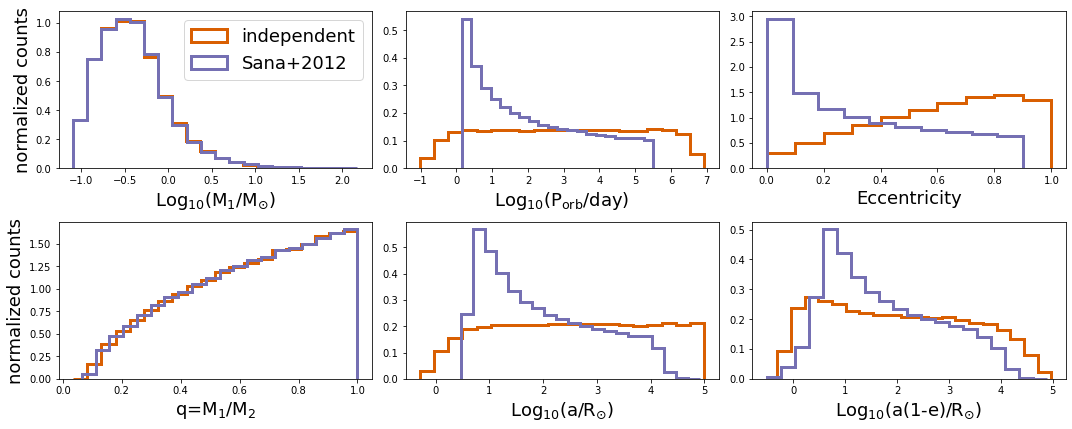

In [16]:
fig = plt.figure(figsize = (15,6))
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
ax6 = plt.subplot(236)

ax1.hist(np.log10(initC_logP.mass_1), bins = 20, histtype='step', density=True,
         lw=3, color=colors['purple'], label='independent')
ax1.hist(np.log10(initC_Sana.mass_1), bins = 20, histtype='step', density=True,
         lw=3, color=colors['orange'], label='Sana+2012')
ax1.set_xlabel(r'Log$_{10}$(M$_1$/M$_{\odot}$)', size=18)
ax1.set_ylabel('normalized counts', size=18)
ax1.legend(prop={'size' : 18})

ax2.hist(np.log10(initC_logP.porb), bins = 20, histtype='step', density=True,
         lw=3, color=colors['purple'], label='independent')
ax2.hist(np.log10(initC_Sana.porb), bins = 20, histtype='step', density=True,
         lw=3, color=colors['orange'], label='Sana+2012')
ax2.set_xlabel(r'Log$_{10}$(P$_{\rm{orb}}$/day)', size=18)

ax3.hist(initC_logP.ecc, bins = 10, histtype='step', density=True,
         lw=3, color=colors['purple'], label='independent')
ax3.hist(initC_Sana.ecc, bins = 10, histtype='step', density=True,
         lw=3, color=colors['orange'], label='Sana+2012')
ax3.set_xlabel('Eccentricity', size=18)

ax4.hist(initC_logP.mass_2/initC_logP.mass_1, bins = 20, histtype='step', density=True,
         lw=3, color=colors['purple'], label='independent')
ax4.hist(initC_Sana.mass_2/initC_Sana.mass_1, bins = 20, histtype='step', density=True,
         lw=3, color=colors['orange'], label='Sana+2012')
ax4.set_xlabel(r'q=M$_1$/M$_2$', size=18)
ax4.set_ylabel('normalized counts', size=18)

ax5.hist(np.log10(initC_logP.sep), bins = 20, histtype='step', density=True,
         lw=3, color=colors['purple'], label='independent')

ax5.hist(np.log10(initC_Sana.sep), bins = 20, histtype='step', density=True,
         lw=3, color=colors['orange'], label='Sana+2012')
ax5.set_xlabel(r'Log$_{10}$(a/R$_{\odot}$)', size=18)

ax6.hist(np.log10(initC_logP.sep*(1-initC_logP.ecc)), bins = 20, histtype='step', density=True,
         lw=3, color=colors['purple'], label='independent')

ax6.hist(np.log10(initC_Sana.sep*(1-initC_Sana.ecc)), bins = 20, histtype='step', density=True,
         lw=3, color=colors['orange'], label='Sana+2012')
ax6.set_xlabel(r'Log$_{10}$(a(1-e)/R$_{\odot}$)', size=18)
fig.tight_layout()
fig.show()

In [17]:
from cosmic.sample.sampler import multidim

In [18]:
InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = InitialBinaryTable.sampler('multidim', final_kstar1=[11], final_kstar2=[11], rand_seed=2, nproc=1, SF_start=13700.0, SF_duration=0.0, met=0.02, size=10)

In [19]:
print(InitialBinaries)

   kstar_1  kstar_2     mass_1    mass_2           porb       ecc  \
0      1.0      1.0   3.686712  0.806328  161026.959409  0.829034   
1      1.0      1.0   0.974390  0.881366      25.334034  0.126290   
2      1.0      1.0   2.479799  0.831304      60.621679  0.545004   
3      1.0      1.0   1.125074  0.976918   29228.830150  0.713424   
4      1.0      1.0   5.805987  3.358740     118.636803  0.718332   
5      1.0      1.0  15.916263  6.395108   15884.228362  0.727113   
6      1.0      1.0   1.710108  1.069395   55655.129136  0.900815   
7      1.0      1.0   2.401816  1.261706     189.173552  0.264586   
8      1.0      1.0   2.892138  0.988218     179.329874  0.085426   
9      1.0      1.0   2.433570  2.134182   14727.306379  0.261487   

   metallicity   tphysf    mass0_1   mass0_2  ...  tacc_1  tacc_2  epoch_1  \
0         0.02  13700.0   3.686712  0.806328  ...     0.0     0.0      0.0   
1         0.02  13700.0   0.974390  0.881366  ...     0.0     0.0      0.0   
2     

In [20]:
final_kstar = np.linspace(0,14,15)
colors = {'green' : '#1b9e77', 'purple' : '#d95f02', 'orange' : '#7570b3'}
final_kstar = np.linspace(0,14,15)
initC_mult, m_sin_mult, m_bin_mult, n_sin_mult, n_bin_mult = InitialBinaryTable.sampler('multidim',
                                                                                        final_kstar1=final_kstar,
                                                                                        final_kstar2=final_kstar,
                                                                                        rand_seed=2,
                                                                                        nproc=1,
                                                                                        SF_start=13700.0,
                                                                                        SF_duration=0.0,
                                                                                        met=0.02,
                                                                                        size=100000)
initC_mult['sep'] = a_from_p(p=initC_mult.porb, m1=initC_mult.mass_1, m2=initC_mult.mass_2)

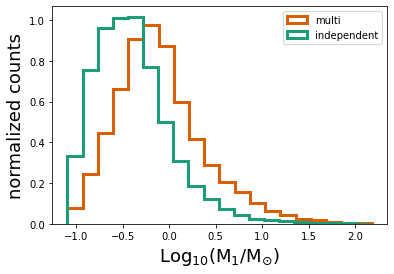

In [30]:
plt.hist(np.log10(initC_mult.mass_1), bins = 20, histtype='step', density=True,
         lw=3, color=colors['purple'], label='multi')
plt.hist(np.log10(initC_logP.mass_1), bins = 20, histtype='step', density=True,
         lw=3, color=colors['green'], label='independent')
plt.legend()
plt.xlabel(r'Log$_{10}$(M$_1$/M$_{\odot}$)', size=18)
plt.ylabel('normalized counts', size=18)
plt.show()

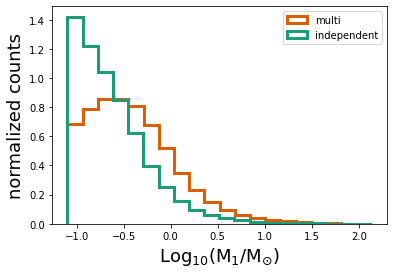

In [31]:
plt.hist(np.log10(initC_mult.mass_2), bins = 20, histtype='step', density=True,
         lw=3, color=colors['purple'], label='multi')
plt.hist(np.log10(initC_logP.mass_2), bins = 20, histtype='step', density=True,
         lw=3, color=colors['green'], label='independent')
plt.legend()
plt.xlabel(r'Log$_{10}$(M$_1$/M$_{\odot}$)', size=18)
plt.ylabel('normalized counts', size=18)
plt.show()

In [35]:
print(m_bin_mult)

286908.9982449948


In [36]:
from cosmic.evolve import Evolve

In [37]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1}


In [38]:
bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

In [39]:
print(bcm.iloc[:10])

     tphys  kstar_1   mass0_1    mass_1       lum_1     rad_1        teff_1  \
0      0.0      1.0  3.686712  3.686712  168.770026  2.337430  13668.603686   
0  13700.0     11.0  0.813263  0.813263    0.000003  0.010159   2420.129431   
1      0.0      1.0  0.974390  0.974390    0.553692  0.859742   5393.896416   
1  13700.0      2.0  0.974245  0.974245    1.834161  1.859697   4947.752034   
2      0.0      1.0  2.479799  2.479799   35.960890  1.878811  10358.233251   
2  13700.0     11.0  0.616944  0.616944    0.000003  0.012552   2182.988314   
3      0.0      1.0  1.125074  1.125074    1.113993  1.028096   5874.533980   
3  13700.0     11.0  0.513016  0.513016    0.000057  0.014025   4250.487032   
4      0.0      1.0  5.805987  5.805987  892.365648  3.027531  18212.143051   
4  13700.0     15.0  0.922493  0.000000    0.072121  0.008885  31875.723819   

    massc_1    radc_1        menv_1  ...          porb           sep  \
0  0.000000  0.000000  1.000000e-10  ...  1.610270e+05  20

In [40]:
print(bpp)

           tphys    mass_1    mass_2  kstar_1  kstar_2           sep  \
0       0.000000  3.686712  0.806328      1.0      1.0  20546.178672   
0     227.344776  3.685941  0.806328      2.0      1.0  20549.705507   
0     228.482113  3.685686  0.806328      3.0      1.0  20550.871773   
0     229.578244  3.684182  0.806328      4.0      1.0  20557.756156   
0     274.607762  3.642206  0.806328      5.0      1.0  20751.715145   
..           ...       ...       ...      ...      ...           ...   
9    1016.712071  0.631755  2.309330     11.0      4.0   5491.571643   
9    1228.214144  0.631756  2.278526     11.0      5.0   5549.692313   
9    1232.404068  0.631777  2.246761     11.0      6.0   5610.514067   
9    1233.387405  0.640961  0.608647     11.0     11.0  12608.126838   
9   13700.000000  0.640961  0.608647     11.0     11.0  12608.126839   

             porb       ecc    RRLO_1    RRLO_2  ...  B_2  bacc_1  bacc_2  \
0   161026.959409  0.829034  0.001297  0.000812  ...  0.0 

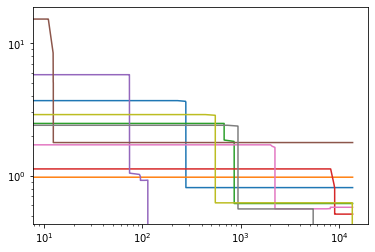

In [63]:
for i in range(9):
    plt.loglog(bpp.tphys[i],bpp.mass_1[i])